In [12]:
import numpy as np
import pandas as pd
import statistics
import matplotlib.pyplot as plt

from config import NUMBER_OF_GAMES
from player import MiniMaxPlayer, MiniMaxPlayerWithRegressor, MiniMaxPlayerWithHFunction, MiniMaxPlayerWithHFunctionPrediction, RandomPlayer
from display import GameVisualize
from mlp import FlexibleMLP

### **Task 1:** branch limited Minimax

Branch-limited with H0 static evaluation minimax compared with original minimax with H5

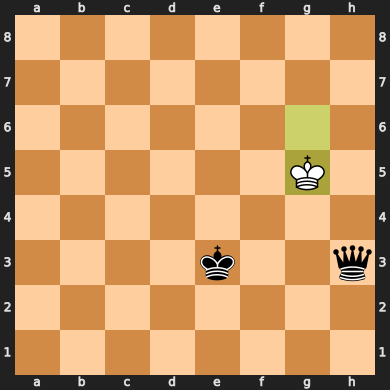

In [2]:
game = GameVisualize()
player_1 = MiniMaxPlayer(True)
# player_1 = RandomPlayer(True)
player_2 = MiniMaxPlayer(False, depth=2, choice_limit=5)
result_list = []
black_time = []
white_time = []
x = []
for i in range(NUMBER_OF_GAMES):
    result = game.start_game(player_1, player_2, visual=True, pause=1e-15)
    x.append(i + 1)
    result_list.append(1 if result["white_win"] else 0)
    black_time.append(statistics.mean(result["black_time"]))
    white_time.append(statistics.mean(result["white_time"]))

Text(0, 0.5, 'Average step time (s)')

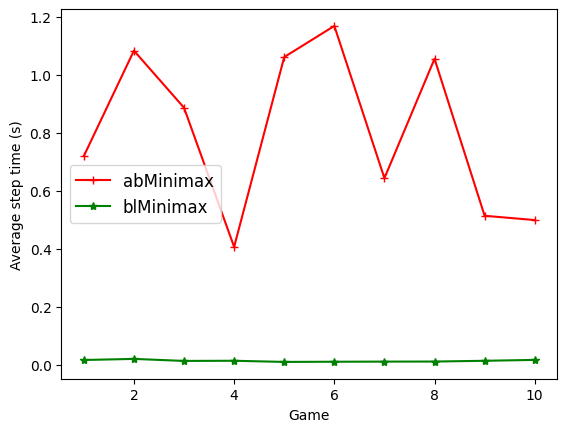

In [3]:
plt.plot(x, white_time, marker='+', label='abMinimax', color='red')  
plt.plot(x, black_time, marker='*', label='blMinimax', color='green')  
plt.legend(fontsize=12)
plt.xlabel("Game")
plt.ylabel("Average step time (s)")

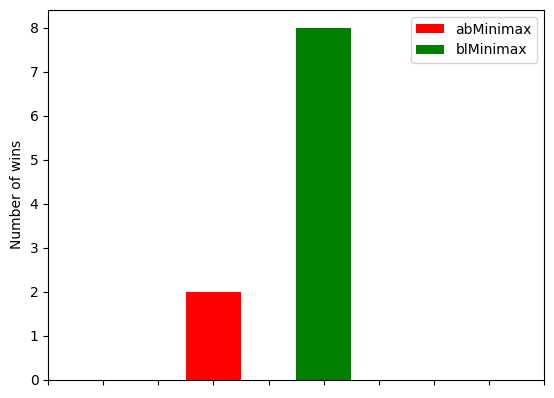

In [5]:
white_count = sum(result_list)
black_count = len(result_list) - white_count
column1 = [white_count]  # Data for the first column
column2 = [black_count]  # Data for the second column

bar_width = 1

plt.bar(5 - bar_width, column1, width=bar_width, label='abMinimax', color='red')
plt.bar(5 + bar_width, column2, width=bar_width, label='blMinimax', color='green')

# Add labels and title
plt.ylabel('Number of wins')
plt.xticks(x, '')  # Set the category names as x-ticks
plt.legend()

### **Task 2:** branch limited Minimax with depth ***l***

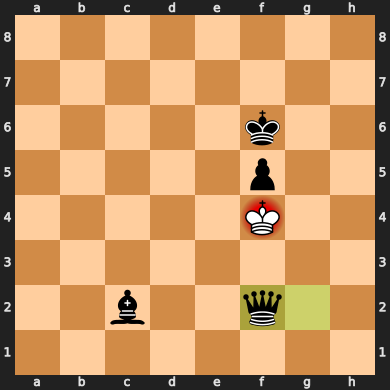

In [3]:
game = GameVisualize()
result_dict = {} # [avg_time, number of wins compared to l - 1]
x = range(3, 6) # test to H5
for l in x:
    white_time = []
    black_time = []
    result_list = []
    player_1 = MiniMaxPlayer(True, depth=l, choice_limit=5)
    player_2 = MiniMaxPlayer(False, depth=l - 1, choice_limit=5)
    for i in range(NUMBER_OF_GAMES):
        result = game.start_game(player_1, player_2, visual=True, pause=1e-15)
        result_list.append(1 if result["white_win"] else 0)
        black_time.append(statistics.mean(result["black_time"]))
        white_time.append(statistics.mean(result["white_time"]))
    if l == x[0]:
        result_dict[l - 2] = [statistics.mean(black_time), len(result_list) - sum(result_list)]
        result_dict[l - 1] = [statistics.mean(white_time), sum(result_list)]
    else:
        result_dict[l - 1] = [statistics.mean(white_time), sum(result_list)]

Text(0, 0.5, 'Average time (s)')

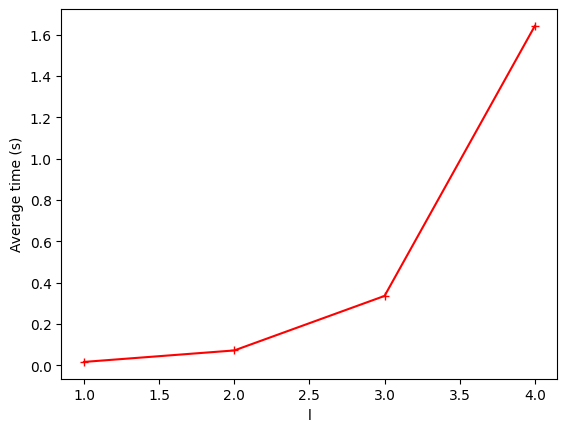

In [5]:
x = list(x)
x.insert(0, 2)
plt.plot([i - 1 for i in x], [result_dict[i - 1][0] for i in x], marker='+', color='red')
plt.xlabel("l")
plt.ylabel("Average time (s)")

Text(0, 0.5, 'Number of wins')

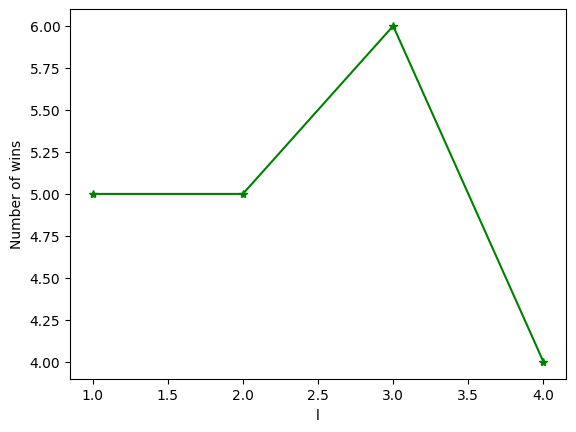

In [6]:
plt.plot([i - 1 for i in x], [result_dict[i - 1][1] for i in x], marker='*', color='green')  
# plt.legend(fontsize=12)
plt.xlabel("l")
plt.ylabel("Number of wins")

#### Test again with two best model, H1 and H3

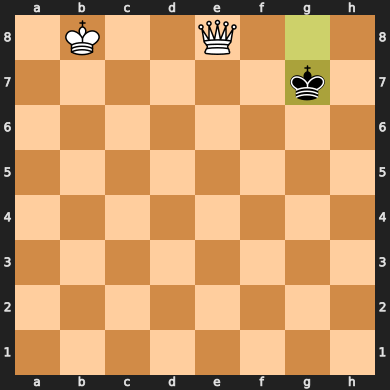

In [12]:
game = GameVisualize()
player_1 = MiniMaxPlayer(True, depth=2, choice_limit=5)
player_2 = MiniMaxPlayer(False, depth=4, choice_limit=5)
result_list = []
black_time = []
white_time = []
x = []
for i in range(NUMBER_OF_GAMES):
    result = game.start_game(player_1, player_2, visual=True, pause=1e-15)
    x.append(i + 1)
    result_list.append(1 if result["white_win"] else 0)
    black_time.append(statistics.mean(result["black_time"]))
    white_time.append(statistics.mean(result["white_time"]))

Text(0, 0.5, 'Average step time (s)')

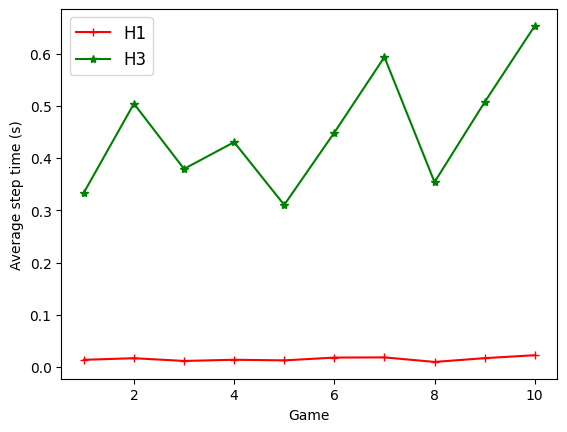

In [13]:
plt.plot(x, white_time, marker='+', label='H1', color='red')  
plt.plot(x, black_time, marker='*', label='H3', color='green')  
plt.legend(fontsize=12)
plt.xlabel("Game")
plt.ylabel("Average step time (s)")

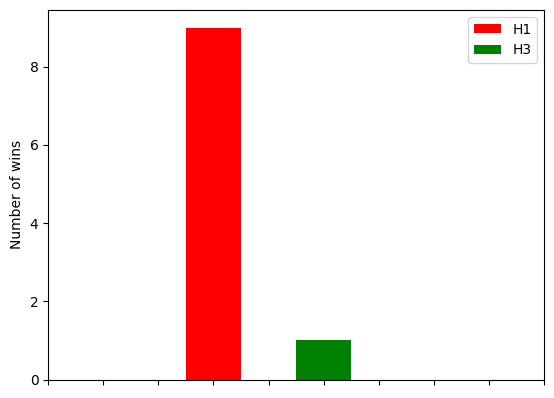

In [14]:
white_count = sum(result_list)
black_count = len(result_list) - white_count
column1 = [white_count]  # Data for the first column
column2 = [black_count]  # Data for the second column

bar_width = 1

plt.bar(5 - bar_width, column1, width=bar_width, label='H1', color='red')
plt.bar(5 + bar_width, column2, width=bar_width, label='H3', color='green')

# Add labels and title
plt.ylabel('Number of wins')
plt.xticks(x, '')  # Set the category names as x-ticks
plt.legend()

### **Task 3:** Train the model and compare to the non-predictive Minimax

The train code is attached in the `train.ipynb` file, the trained model state dict path is `model.pth`, the model is loaded and is a property of ChessGame class.

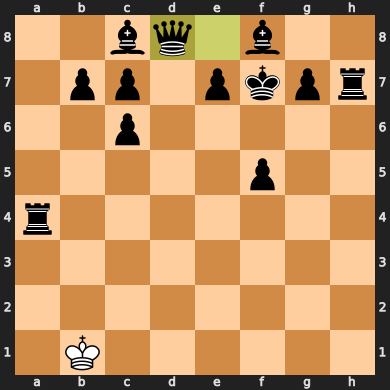

In [9]:
game = GameVisualize()
player_1 = MiniMaxPlayer(True)
# player_1 = RandomPlayer(True)
player_2 = MiniMaxPlayerWithRegressor(False)
result_list = []
black_time = []
white_time = []
x = []
for i in range(NUMBER_OF_GAMES):
    result = game.start_game(player_1, player_2, visual=True, pause=1e-15)
    x.append(i + 1)
    result_list.append(1 if result["white_win"] else 0)
    black_time.append(statistics.mean(result["black_time"]))
    white_time.append(statistics.mean(result["white_time"]))

Text(0, 0.5, 'Average step time (s)')

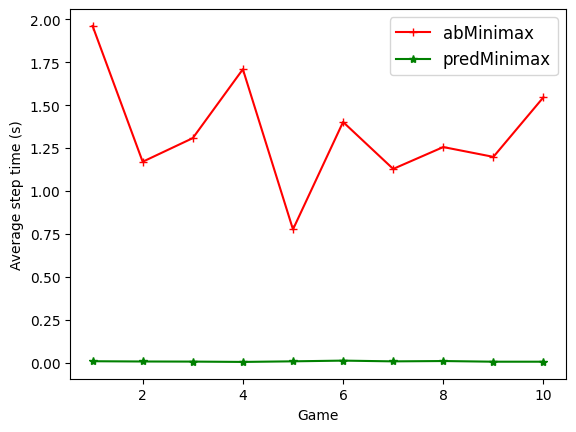

In [10]:
plt.plot(x, white_time, marker='+', label='abMinimax', color='red')  
plt.plot(x, black_time, marker='*', label='predMinimax', color='green')  
plt.legend(fontsize=12)
plt.xlabel("Game")
plt.ylabel("Average step time (s)")

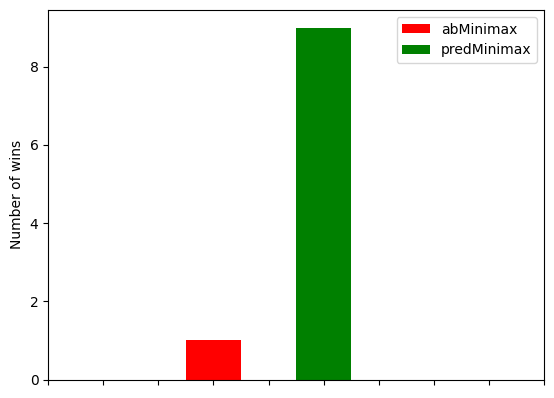

In [11]:
white_count = sum(result_list)
black_count = len(result_list) - white_count
column1 = [white_count]  # Data for the first column
column2 = [black_count]  # Data for the second column

bar_width = 1

plt.bar(5 - bar_width, column1, width=bar_width, label='abMinimax', color='red')
plt.bar(5 + bar_width, column2, width=bar_width, label='predMinimax', color='green')

# Add labels and title
plt.ylabel('Number of wins')
plt.xticks(x, '')  # Set the category names as x-ticks
plt.legend()

### **Task 4:** Modify blMinimaxl to use regressor

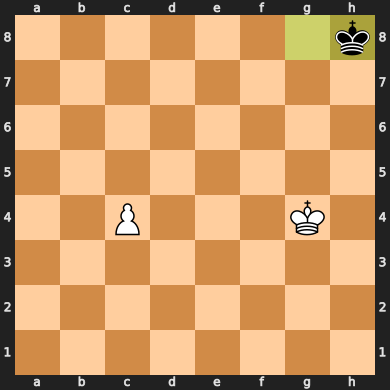

In [8]:
optimal_l = 3
game = GameVisualize()
player_1 = MiniMaxPlayer(True, depth=optimal_l + 1, choice_limit=5)
# player_1 = RandomPlayer(True)
player_2 = MiniMaxPlayerWithRegressor(False, depth=optimal_l + 1, choice_limit=5)
result_list = []
black_time = []
white_time = []
x = []
for i in range(NUMBER_OF_GAMES):
    result = game.start_game(player_1, player_2, visual=True, pause=1e-15)
    x.append(i + 1)
    result_list.append(1 if result["white_win"] else 0)
    black_time.append(statistics.mean(result["black_time"]))
    white_time.append(statistics.mean(result["white_time"]))

Text(0, 0.5, 'Average step time (s)')

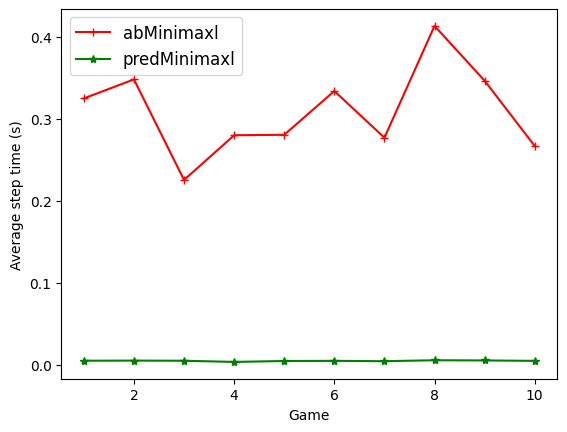

In [ ]:
plt.plot(x, white_time, marker='+', label='blMinimaxl', color='red')  
plt.plot(x, black_time, marker='*', label='predblMinimaxl', color='green')  
plt.legend(fontsize=12)
plt.xlabel("Game")
plt.ylabel("Average step time (s)")

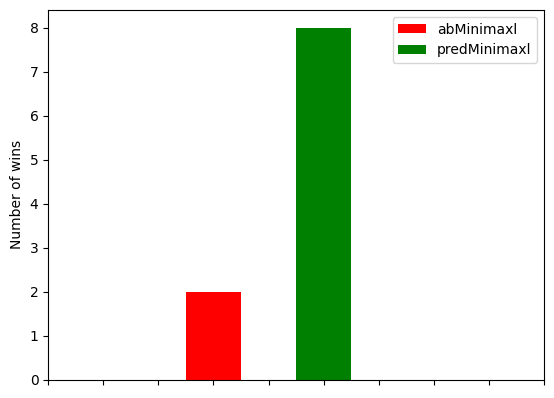

In [11]:
white_count = sum(result_list)
black_count = len(result_list) - white_count
column1 = [white_count]  # Data for the first column
column2 = [black_count]  # Data for the second column

bar_width = 1

plt.bar(5 - bar_width, column1, width=bar_width, label='abMinimaxl', color='red')
plt.bar(5 + bar_width, column2, width=bar_width, label='predMinimaxl', color='green')

# Add labels and title
plt.ylabel('Number of wins')
plt.xticks(x, '')  # Set the category names as x-ticks
plt.legend()

### **Task 5:** Define a new H function

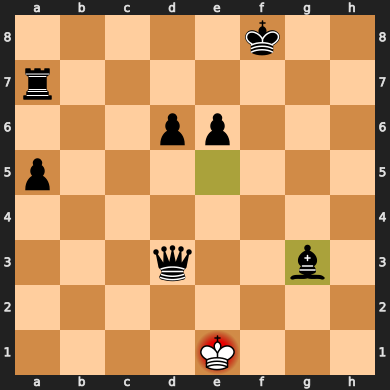

In [2]:
optimal_l = 4
game = GameVisualize()
player_1 = MiniMaxPlayer(True, depth=optimal_l, choice_limit=5)
# player_1 = RandomPlayer(True)
player_2 = MiniMaxPlayerWithHFunction(False, depth=optimal_l, choice_limit=5)
result_list = []
black_time = []
white_time = []
x = []
for i in range(NUMBER_OF_GAMES):
    result = game.start_game(player_1, player_2, visual=True, pause=1e-15)
    x.append(i + 1)
    result_list.append(1 if result["white_win"] else 0)
    black_time.append(statistics.mean(result["black_time"]))
    white_time.append(statistics.mean(result["white_time"]))

Text(0, 0.5, 'Average step time (s)')

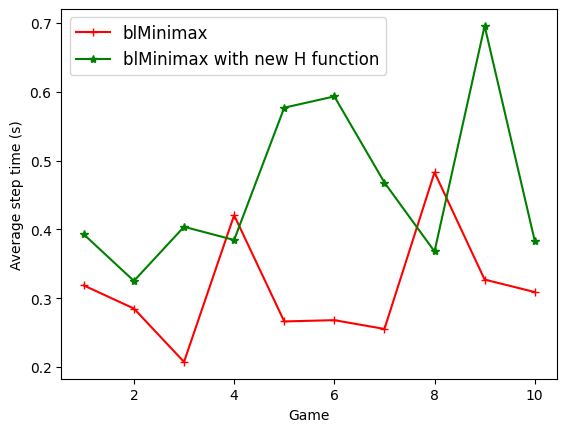

In [3]:
plt.plot(x, white_time, marker='+', label='blMinimax', color='red')  
plt.plot(x, black_time, marker='*', label='blMinimax with new H function', color='green')  
plt.legend(fontsize=12)
plt.xlabel("Game")
plt.ylabel("Average step time (s)")

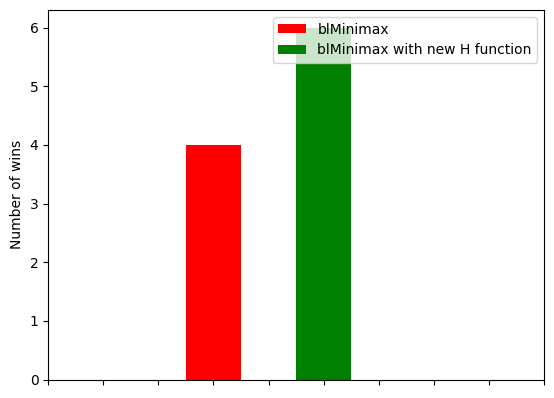

In [5]:
white_count = sum(result_list)
black_count = len(result_list) - white_count
column1 = [white_count]  # Data for the first column
column2 = [black_count]  # Data for the second column

bar_width = 1

plt.bar(5 - bar_width, column1, width=bar_width, label='blMinimax', color='red')
plt.bar(5 + bar_width, column2, width=bar_width, label='blMinimax with new H function', color='green')

# Add labels and title
plt.ylabel('Number of wins')
plt.xticks(x, '')  # Set the category names as x-ticks
plt.legend()

#### Use the trained model to predict HL value given f(h) values

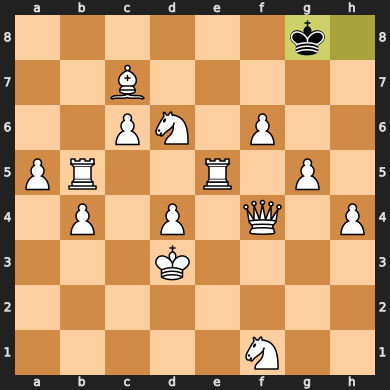

In [6]:
optimal_l = 4
game = GameVisualize()
player_1 = MiniMaxPlayer(True, depth=optimal_l, choice_limit=5)
# player_1 = RandomPlayer(True)
player_2 = MiniMaxPlayerWithHFunctionPrediction(False, depth=optimal_l, choice_limit=5)
result_list = []
black_time = []
white_time = []
x = []
for i in range(NUMBER_OF_GAMES):
    result = game.start_game(player_1, player_2, visual=True, pause=1e-15)
    x.append(i + 1)
    result_list.append(1 if result["white_win"] else 0)
    black_time.append(statistics.mean(result["black_time"]))
    white_time.append(statistics.mean(result["white_time"]))

Text(0, 0.5, 'Average step time (s)')

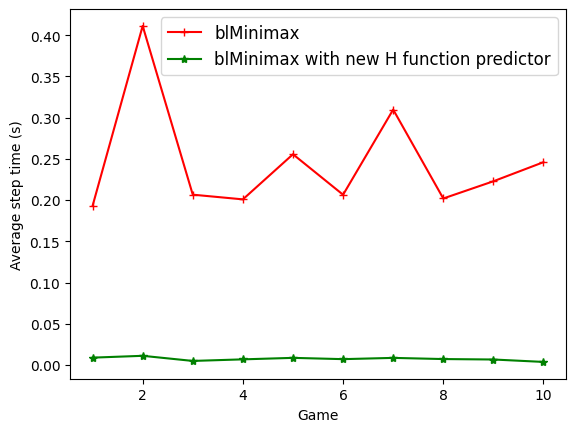

In [7]:
plt.plot(x, white_time, marker='+', label='blMinimax', color='red')  
plt.plot(x, black_time, marker='*', label='blMinimax with new H function predictor', color='green')  
plt.legend(fontsize=12)
plt.xlabel("Game")
plt.ylabel("Average step time (s)")

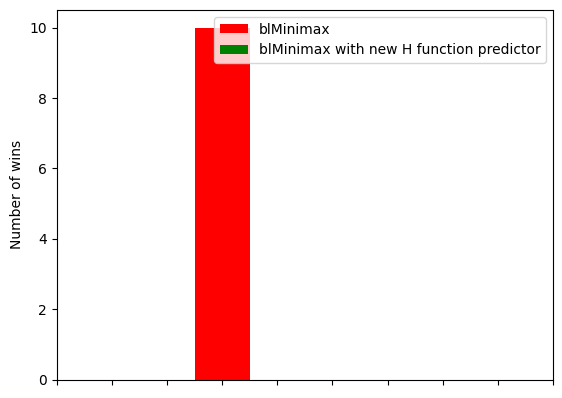

In [8]:
white_count = sum(result_list)
black_count = len(result_list) - white_count
column1 = [white_count]  # Data for the first column
column2 = [black_count]  # Data for the second column

bar_width = 1

plt.bar(5 - bar_width, column1, width=bar_width, label='blMinimax', color='red')
plt.bar(5 + bar_width, column2, width=bar_width, label='blMinimax with new H function predictor', color='green')

# Add labels and title
plt.ylabel('Number of wins')
plt.xticks(x, '')  # Set the category names as x-ticks
plt.legend()

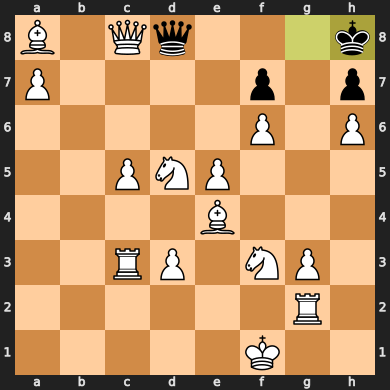

In [13]:
optimal_l = 4
game = GameVisualize()
player_1 = MiniMaxPlayerWithHFunction(True, depth=optimal_l, choice_limit=5)
# player_1 = RandomPlayer(True)
player_2 = MiniMaxPlayerWithHFunctionPrediction(False, depth=optimal_l, choice_limit=5)
result_list = []
black_time = []
white_time = []
x = []
for i in range(NUMBER_OF_GAMES):
    result = game.start_game(player_1, player_2, visual=True, pause=1e-15)
    x.append(i + 1)
    result_list.append(1 if result["white_win"] else 0)
    black_time.append(statistics.mean(result["black_time"]))
    white_time.append(statistics.mean(result["white_time"]))

Text(0, 0.5, 'Average step time (s)')

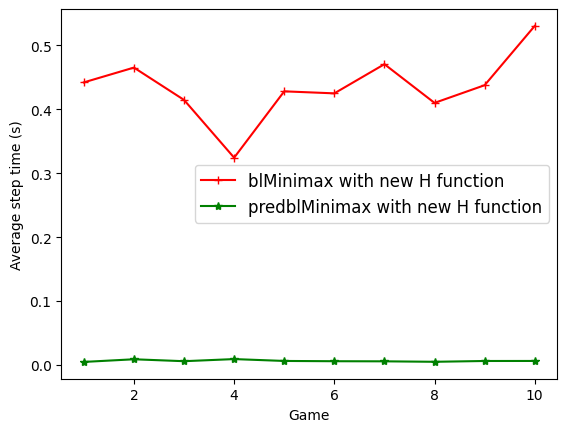

In [14]:
plt.plot(x, white_time, marker='+', label='blMinimax with new H function', color='red')  
plt.plot(x, black_time, marker='*', label='predblMinimax with new H function', color='green')  
plt.legend(fontsize=12)
plt.xlabel("Game")
plt.ylabel("Average step time (s)")

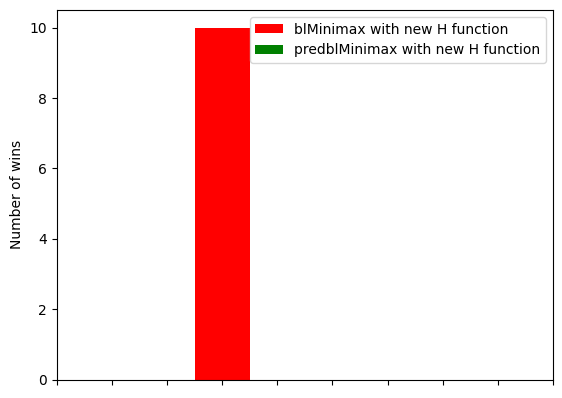

In [15]:
white_count = sum(result_list)
black_count = len(result_list) - white_count
column1 = [white_count]  # Data for the first column
column2 = [black_count]  # Data for the second column

bar_width = 1

plt.bar(5 - bar_width, column1, width=bar_width, label='blMinimax with new H function', color='red')
plt.bar(5 + bar_width, column2, width=bar_width, label='predblMinimax with new H function', color='green')

# Add labels and title
plt.ylabel('Number of wins')
plt.xticks(x, '')  # Set the category names as x-ticks
plt.legend()